<a href="https://colab.research.google.com/github/rimchristian/NBA-Referee-Stats/blob/main/nbareferee.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from google.colab import drive
import matplotlib.pyplot as plt

In [ ]:
filename = '/content/NBA Referee Stats.csv'

In [ ]:
df = pd.read_csv(filename)
df.head()

,Season,Season type,Referee,Games,Total fouls,Shooting,Personal,Loose ball,Personal take,Offensive charge,...,Delay technical,Lane violation,Jump ball violation,Flagrant 2,Hanging technical,Unsportsmanlike technical,Taunting technical,Excess timeout technical,Double lane,Too many players technical
0,2016-17,Playoffs,Bennie Adams,3,48,18,20,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2016-17,Playoffs,Bill Kennedy,8,101,42,40,6,1,2,...,0,0,0,0,0,0,0,0,0,0
2,2016-17,Playoffs,Bill Spooner,5,47,18,15,5,2,0,...,0,0,0,0,0,0,0,0,0,0
3,2016-17,Playoffs,Brent Barnaky,1,13,5,2,0,0,2,...,0,0,0,0,0,0,0,0,0,0
4,2016-17,Playoffs,Brian Forte,4,55,24,19,0,4,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421 entries, 0 to 420
Data columns (total 34 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Season                      421 non-null    object
 1   Season type                 421 non-null    object
 2   Referee                     421 non-null    object
 3   Games                       421 non-null    int64 
 4   Total fouls                 421 non-null    int64 
 5   Shooting                    421 non-null    int64 
 6   Personal                    421 non-null    int64 
 7   Loose ball                  421 non-null    int64 
 8   Personal take               421 non-null    int64 
 9   Offensive charge            421 non-null    int64 
 10  Offensive                   421 non-null    int64 
 11  Kicked ball                 421 non-null    int64 
 12  Technical                   421 non-null    int64 
 13  Defensive goaltending       421 non-null    int64 

In [ ]:
# Grouping the columns based on the Season and the season type

grouped = df.groupby("Season")

grouped = df.groupby('Season type', axis='columns')

grouped = df.groupby(["Season", "Season type"])
grouped.sum()

Games  Total fouls  Shooting  Personal  Loose ball  \
Season  Season type                                                          
2016-17 Playoffs          237         3494      1484      1082         207   
        Regular Season   3689        52338     23152     15149        3104   
2017-18 Playoffs          247         3443      1449      1309         199   
        Regular Season   3673        50284     22189     16908        2800   
2018-19 Playoffs          246         3643      1623      1281         237   
        Regular Season   3689        52218     23921     18067        2998   
2019-20 Playoffs          249         3609      1659      1165         238   
        Regular Season   3176        44318     20745     14554        2521   

                        Personal take  Offensive charge  Offensive  \
Season  Season type                                                  
2016-17 Playoffs                   76                80        172   
        Regular Season           1262              1348       2618   
2017-18 Playoffs                   63                85         16   
        Regular Season           1211              1503       1043   
2018-19 Playoffs                  142               107         26   
        Regular Season           1589              1366        473   
2019-20 Playoffs                  120               133         32   
        Regular Season           1560              1290        334   

                        Kicked ball  Technical  ...  Delay technical  \
Season  Season type                             ...                    
2016-17 Playoffs                 36         54  ...                3   
        Regular Season          833        737  ...               33   
2017-18 Playoffs                 68         42  ...                0   
        Regular Season          955        795  ...               18   
2018-19 Playoffs                 62         56  ...                1   
        Regular Season          977        908  ...               24   
2019-20 Playoffs                 79         57  ...                1   
        Regular Season          822        791  ...               33   

                        Lane violation  Jump ball violation  Flagrant 2  \
Season  Season type                                                       
2016-17 Playoffs                     0                    2           1   
        Regular Season              70                   14          19   
2017-18 Playoffs                     0                    0           2   
        Regular Season              10                   15           8   
2018-19 Playoffs                     0                    1           1   
        Regular Season               2                    7           9   
2019-20 Playoffs                     0                    1           2   
        Regular Season               2                   16           6   

                        Hanging technical  Unsportsmanlike technical  \
Season  Season type                                                    
2016-17 Playoffs                        0                          1   
        Regular Season                 15                          6   
2017-18 Playoffs                        0                          0   
        Regular Season                  3                          3   
2018-19 Playoffs                        0                          0   
        Regular Season                 24                         10   
2019-20 Playoffs                        0                          0   
        Regular Season                  5                          5   

                        Taunting technical  Excess timeout technical  \
Season  Season type                                                    
2016-17 Playoffs                         0                         0   
        Regular Season                   9                         4   
2017-18 Playoffs                         0                   

The below visual shows the number of total fouls called. 

Text(0.5, 1.0, 'Total Foul Calls')

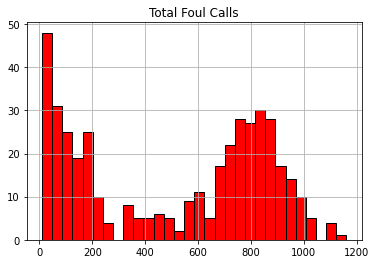

In [ ]:
# finding the value counts 

df['Total fouls'].hist(bins=30, edgecolor='black', color='r')
plt.ticklabel_format(useOffset=False, style='plain')
plt.title('Total Foul Calls')


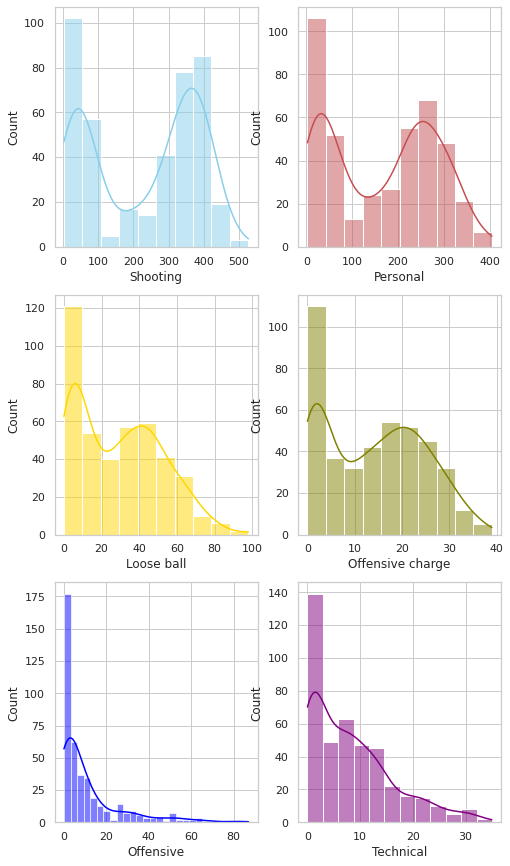

In [ ]:
# building multiple histograms to see the distribution flow for the following foul calls
import seaborn as sns

sns.set(style='whitegrid')

fig,axs = plt.subplots(3,2, figsize = (8,15))
sns.histplot(data=df, x='Shooting', kde=True, color='skyblue',ax=axs[0,0])
sns.histplot(data=df,x='Personal',kde=True,color='r',ax=axs[0,1])
sns.histplot(data=df,x='Loose ball',kde=True,color='gold',ax=axs[1,0])
sns.histplot(data=df,x='Offensive charge',kde=True,color='olive',ax=axs[1,1])
sns.histplot(data=df,x='Offensive',kde=True,color='blue',ax=axs[2,0])
sns.histplot(data=df,x='Technical',kde=True,color='purple',ax=axs[2,1])
                                                                 

In [ ]:
totalgames = df.groupby(['Season'])['Total fouls'].nunique()
totalgames


Season
2016-17    97
2017-18    96
2018-19    98
2019-20    98
Name: Total fouls, dtype: int64

In [ ]:
uniqueSeason = list(totalgames.index)
uniqueSeason

['2016-17', '2017-18', '2018-19', '2019-20']

In [ ]:
numFouls = list(totalgames.values)
numFouls

[97, 96, 98, 98]

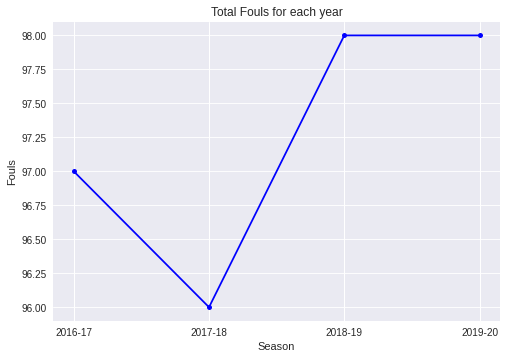

In [ ]:
# plotting the variables I created above with parameters
plt.style.use('seaborn')
plt.plot(uniqueSeason,numFouls,marker='.',markersize=10,c='blue')
plt.title('Total Fouls for each year')
plt.xlabel('Season')
plt.ylabel('Fouls')
plt.grid(axis='y',alpha=.9,linestyle='-') # only shows the horizontal grid line


I created a yearly foul line chart that shows the total fouls for each year. This should explain the overall number of fouls. 

For my next visual, I will visualize the two common fouls: Shooting Foul and Charging Foul. 

(0.0, 50.0)

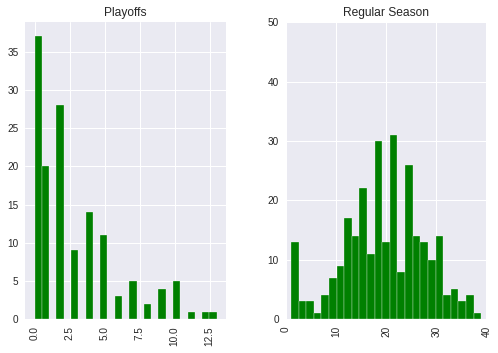

In [ ]:
# comparing charging fouls in the playoffs vs regular season
df.hist(column = 'Offensive charge', by = 'Season type',color='green',bins=25);
plt.xlim(left=0,right=40)
plt.ylim(bottom=0,top=50)


(0.0, 80.0)

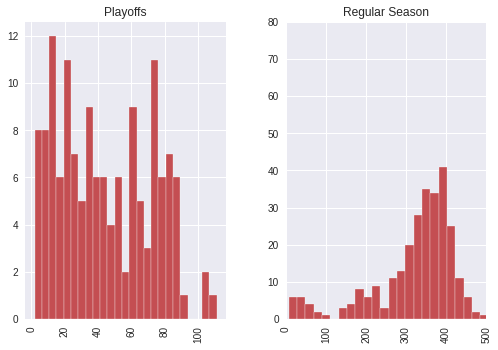

In [ ]:
# comparing shooting fouls in the playoffs vs regular season
df.hist(column = 'Shooting', by = 'Season type',color='r',bins=25);
plt.xlim(left=0,right=500)
plt.ylim(bottom=0,top=80)

In [ ]:
# identifying correlations of the data
corr = df.corr()
corr.head()

,Games,Total fouls,Shooting,Personal,Loose ball,Personal take,Offensive charge,Offensive,Kicked ball,Technical,...,Delay technical,Lane violation,Jump ball violation,Flagrant 2,Hanging technical,Unsportsmanlike technical,Taunting technical,Excess timeout technical,Double lane,Too many players technical
Games,1.000000,0.986052,0.982956,0.961630,0.881243,0.875809,0.903451,0.567227,0.859228,0.737765,...,0.344840,0.317023,0.242825,0.225249,0.300344,0.208220,0.170167,0.082254,0.103930,0.122279
Total fouls,0.986052,1.000000,0.987936,0.980869,0.911096,0.863601,0.913352,0.590533,0.862566,0.769399,...,0.370866,0.329462,0.254446,0.236841,0.329117,0.207048,0.161744,0.092287,0.111968,0.135155
Shooting,0.982956,0.987936,1.000000,0.955522,0.872453,0.870575,0.891849,0.545582,0.848653,0.742185,...,0.361015,0.307823,0.255255,0.216029,0.298486,0.212946,0.154285,0.071718,0.097452,0.127150
Personal,0.961630,0.980869,0.955522,1.000000,0.892052,0.848468,0.898436,0.493894,0.853209,0.764144,...,0.341439,0.240701,0.226412,0.213058,0.336296,0.199382,0.122991,0.086340,0.090780,0.113811
Loose ball,0.881243,0.911096,0.872453,0.892052,1.000000,0.758886,0.852344,0.582544,0.788136,0.715390,...,0.321033,0.330821,0.258331,0.250144,0.331609,0.151368,0.125046,0.113861,0.091849,0.140003


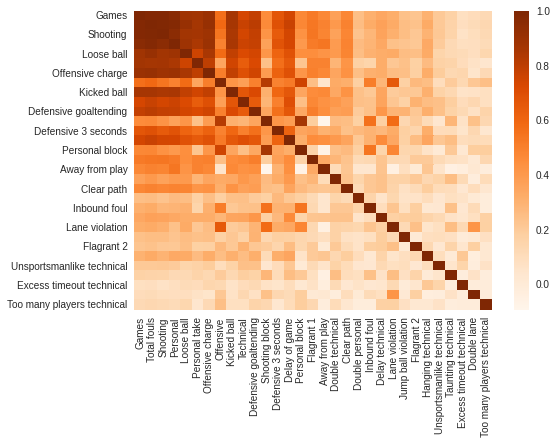

In [ ]:
# visual way to look at the correlation
sns.heatmap(corr,cmap='Oranges')

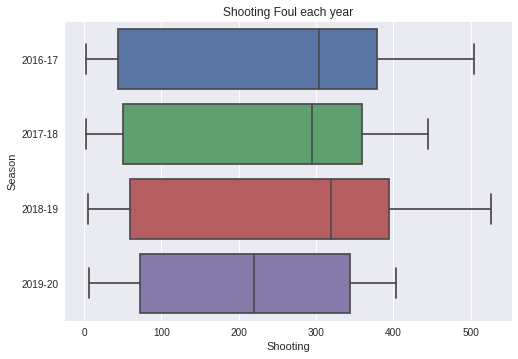

In [ ]:
# Shooting Foul summary each year
sns.boxplot(data=df, x='Shooting', y='Season').set(title='Shooting Foul each year');


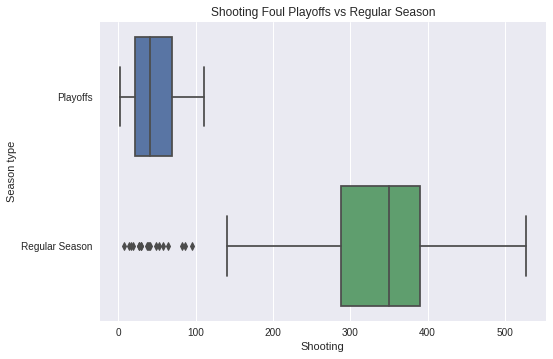

In [ ]:
# Shooting Foul summary for different seasons
sns.boxplot(data=df, x='Shooting', y='Season type').set(title='Shooting Foul Playoffs vs Regular Season');

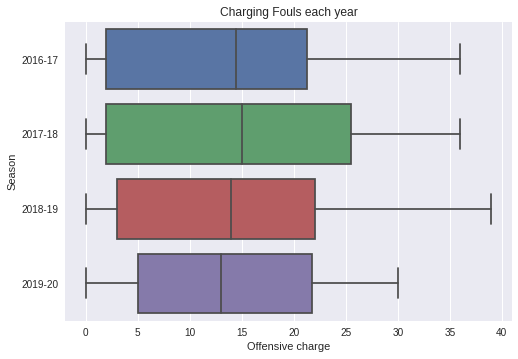

In [ ]:
# Charging Foul summary each year
sns.boxplot(data=df, x='Offensive charge', y='Season').set(title='Charging Fouls each year');

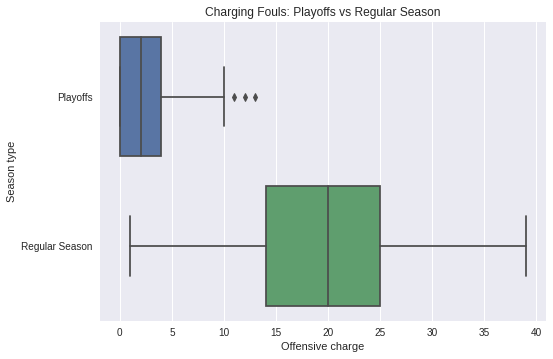

In [ ]:
sns.boxplot(data=df, x='Offensive charge', y='Season type').set(title='Charging Fouls: Playoffs vs Regular Season');

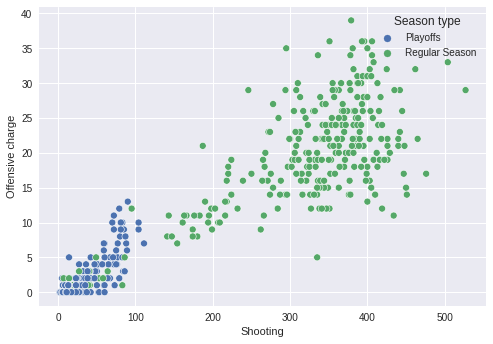

In [ ]:
# creating a scatter plot
sns.scatterplot(data=df, x="Shooting", y="Offensive charge",hue='Season type')


In [ ]:
# finding the correlation coeffciant
correlation = df['Shooting'].corr(df['Offensive charge'])
correlation

0.8918493406100786

In [ ]:
anscombe = sns.load_dataset("anscombe")


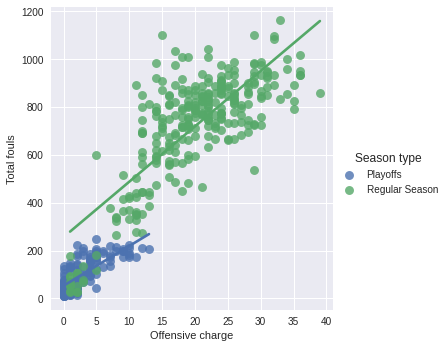

In [111]:
# scatter plot with the regression line
sns.lmplot(x="Offensive charge", y="Total fouls", data=df,ci=None, scatter_kws={"s": 80},hue='Season type');


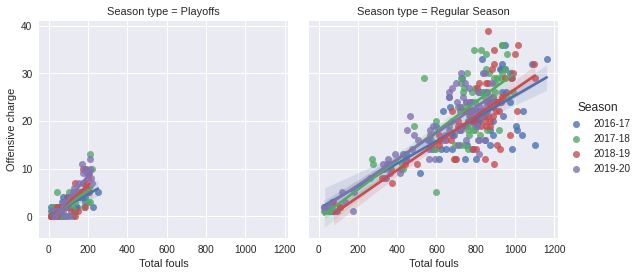

In [110]:
sns.lmplot(
    data=df, x="Total fouls", y="Offensive charge",
    hue="Season", col="Season type", height=4,
)

Based on the plot, there are more offensive fouls in the regular season than the playoffs. Mainly there are a lot of half court offense in the playoffs; therefore, not a lot of time to initiate charging fouls